# Today: EDA GROUPS!

Choose a team, and then spend some time looking at data.  We want you to explore the data using the techniques we learned this far including:

- Grouping / subsetting / segmentation
- Summary statistics
    - Histograms
    - Plotting
- Slicing
- Cleaning data
    - assessing proper types
    - expected values
    - object converstion
   

At the end of our exploratory analysis, each group will be giving a 10 minute presentation on their findings to the rest of class.


In [1]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

## Team Alpha Drone

Since the API from `api.dronestre.am` provides data on drone strikes in near real time, this **might** be useful to hold President Obama accountable to his promise of reducing drone strikes.  Your mission, is to explore drone strike data, doing any accomanying research with your analysis, and report back any good summary statistics.

Also, we would like to know:
 - Is this a good source of data?
     - Why / why not?
     
*Politics aside -- let's keep it to what is measurable in our dataset.  This isn't meant to prove or disprove anything.  It's a **fun** dataset to look at moreso than a motivator of political discourse.*

In [ ]:
# First we need to fetch some data using Python requests from API
# Read more about Python requests:
# http://docs.python-requests.org/en/master/user/quickstart/

import requests

response = requests.get("http://api.dronestre.am/data")
json_data = response.json()
drone_df = pd.DataFrame(json_data['strike'])

In [ ]:
drone_df.head(1)

## Team Popcorn

You're a force to be reckoned with when you `read_csv` into your `movie_df` dataframe.  You are team "Popcorn".  It would be nice to know:

 - Which movies remained in the top 10 the longest
 - Which movies were good investments?
 
 Bonus:
 - Do any holidays impact sales performance or position?


_[There's a data dictionary available!](http://www.amstat.org/publications/jse/v17n1/datasets.mclaren.html)_

In [2]:
movie_df = pd.read_csv("../assets/data/movie_weekend.csv")
movie_df.head(25)

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
0,1.0,A Beautiful Mind,1.0,701.0,12/21/01
1,1.0,A Beautiful Mind,2.0,14820.0,12/28/01
2,1.0,A Beautiful Mind,3.0,8940.0,1/4/02
3,1.0,A Beautiful Mind,4.0,6850.0,1/11/02
4,1.0,A Beautiful Mind,5.0,5280.0,1/18/02
5,1.0,A Beautiful Mind,6.0,5155.0,1/25/02
6,1.0,A Beautiful Mind,7.0,3735.0,2/1/02
7,1.0,A Beautiful Mind,8.0,2840.0,2/8/02
8,1.0,A Beautiful Mind,9.0,3890.0,2/15/02
9,1.0,A Beautiful Mind,10.0,2565.0,2/22/02


In [36]:
movie_df.groupby(['MOVIE', 'NUMBER']).size()

MOVIE                                 NUMBER
A Beautiful Mind                      1.0       23
American Beauty                       2.0       38
Batman                                3.0       13
Beverly Hills Cop                     4.0       33
Chicago                               5.0       36
Crash                                 6.0       23
Departed, The                         7.0       24
ET                                    9.0       52
Empire Strikes Back, The              8.0       15
Forrest Gump                          10.0      42
Ghost Busters                         11.0      30
Gladiator                             12.0      33
Gods and Monsters                     13.0      29
Good Girl, The                        14.0      18
Harry Potter 1: Sorcerer's Stone      15.0      27
Harry Potter 2: Chamber of Secrets    16.0      22
Harry Potter 3: Prisoner of Azkaban   17.0      22
Harry Potter 4: Goblet of Fire        18.0      20
Harry Potter 5: Order of the Phoenix 

In [3]:
movie_df['WEEKEND_DATE'] = pd.to_datetime(movie_df['WEEKEND_DATE'])

In [88]:
top_ten = movie_df.groupby('MOVIE')['WEEK_NUM'].max()
top_ten.sort(ascending=False)
tt = top_ten.head(20)
tt

/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


MOVIE
ET                                  52.0
Raiders of the Lost Ark             43.0
Return of the Jedi                  42.0
Forrest Gump                        42.0
Titanic                             41.0
American Beauty                     38.0
Chicago                             36.0
Beverly Hills Cop                   33.0
Shakespeare in Love                 33.0
Gladiator                           33.0
Lion King, The                      32.0
Run Lola Run                        31.0
You Can Count on Me                 31.0
Star Wars                           31.0
Star Wars: Phantom Menace           31.0
Home Alone                          30.0
Ghost Busters                       30.0
Gods and Monsters                   29.0
Shrek                               29.0
Harry Potter 1: Sorcerer's Stone    27.0
Name: WEEK_NUM, dtype: float64

In [90]:
top_investments = movie_df.groupby('MOVIE')['WEEKEND_PER_THEATER'].sum()
top_investments.sort(ascending=False)
ti = top_investments.tail(20)
ti

/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


MOVIE
Harry Potter 2: Chamber of Secrets      66978.0
Shrek                                   65716.0
Shrek the Third                         64396.0
Spider-Man 2                            63638.0
Pirates 3: At World's End               63285.0
Harry Potter 3: Prisoner of Azkaban     62522.0
Upside of Anger, The                    57568.0
Departed, The                           55394.0
Super Size Me                           55341.0
Harry Potter 5: Order of the Phoenix    51965.0
Thirteen                                51399.0
In the Company of Men                   49422.0
Road Home, The                          47026.0
Crash                                   41036.0
Quinceanera                             32472.0
Last Mimzy, The                         13853.0
Spider-Man 4                              774.0
Spider-Man 5                              604.0
Spider-Man 6                              514.0
Spider-Man 7                              474.0
Name: WEEKEND_PER_THEATER, dtype: 

In [76]:
nf = movie_df.groupby('MOVIE').agg({'WEEKEND_PER_THEATER':sum, 'WEEK_NUM':max})
nfd = pd.DataFrame(nf)
nfd['REV_PER_WEEK'] = nfd['WEEKEND_PER_THEATER'] / nfd['WEEK_NUM']
nfd['REV_PER_WEEK'] = [round(i, 2) for i in nfd['REV_PER_WEEK']]
nfd.reset_index().sort('REV_PER_WEEK', ascending = False)

/Users/Tami/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,MOVIE,WEEKEND_PER_THEATER,WEEK_NUM,REV_PER_WEEK
8,"Empire Strikes Back, The",178013.0,15.0,11867.53
46,Star Wars,228181.0,31.0,7360.68
26,Million Dollar Baby,154115.0,25.0,6164.60
39,Spider-Man,93854.0,16.0,5865.88
41,Spider-Man 3,70368.0,12.0,5864.00
2,Batman,72861.0,13.0,5604.69
37,Shrek 2,77896.0,14.0,5564.00
38,Shrek the Third,64396.0,12.0,5366.33
22,Jurassic Park,97520.0,21.0,4643.81
1,American Beauty,165891.0,38.0,4365.55


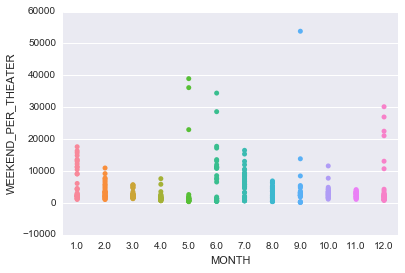

In [82]:
new_frame = movie_df
new_frame['MONTH'] = [value.month for value in movie_df['WEEKEND_DATE']]
# new_frame.groupby('MOVIE')['WEEKEND']
ti_mask = new_frame['MOVIE'].isin(['Star Wars', 'ET', 'Empire Strikes Back, The', 'American Beauty', 'Titanic', 'Return of the Jedi', 
          'Million Dollar Baby', 'Chicago', 'Raiders of the Lost Ark', 'Forrest Gump'])
sns.stripplot(x="MONTH", y="WEEKEND_PER_THEATER", data=new_frame[ti_mask])



In [87]:
import scipy.stats 
sns.jointplot('WEEKEND_PER_THEATER', 'WEEK_NUM', kind="hex", stat_fu, color="#4CB391")

NameError: name 'mean' is not defined

In [ ]:
# weekend_movie = movie_df.groupby(['WEEKEND_DATE','MOVIE']).agg({'WEEKEND_PER_THEATER':sum})
# g = weekend_movie['WEEKEND_PER_THEATER'].groupby(level=0, group_keys=False)
# res = g.apply(lambda x: x.order(ascending=False).head(10))
# res

# weekend_movie = movie_df.groupby(['WEEKEND_DATE','MOVIE']).agg({'WEEKEND_PER_THEATER':sum})
# wm = weekend_movie['WEEKEND_PER_THEATER'].groupby(level=0, group_keys=False)
# wm.apply(lambda x: x.order(ascending=False).head(10))
# type(weekend_movie)

## Team Titanic

Known for it's honesty, the Titanic dataset is a very common dataset for doing classification prediction of fatalities.  For our challenge, why don't we try to focus on the latent characteristics. 

For the record, this is how much know:

![](http://www.glencoe.com/sec/math/studytools/books/0-07-829631-5/images/IQ02-003W-8228662.gif)

Certainly there is a better story to tell.

**Bonus**
 - Can you pull out titles (ie: Mr., Miss, Mrs) from the feature "Name" and assign it to a new variable? We think there could be something interesting to look at in aggregate based on titles!

In [ ]:
titanic_df = pd.read_csv("../assets/data/titanic.csv")
titanic_df.head(3)